# Access, modify, and visualize parameters using the `Parameters` object

The memory efficient `Parameters` class greatly enhances workflows involing common parameter modifications and visualizations. Viewing and modifying individual parameters is simple and utilizes Python dictionaries where the parameter name is the key and a numpy array is the value. Built in plot functions make visualization of one and two dimensional parameters simple.  

In [1]:
import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prms_python import Parameters
%matplotlib inline

# Load parameter file into `Parameters` object 

In [2]:
# only argument to initiate a Parameters object is the path to the file
params = Parameters('../test/data/models/lbcd/parameters')

The `base_file` attribute holds the path to the initial parameter file that was read when making the `Parameter` instance

In [3]:
params.base_file

'../test/data/models/lbcd/parameters'

## Other `Parameter` attributes and how they may be useful

In [4]:
# dimensions that are found in the model as an ordered dictionary
params.dimensions

OrderedDict([('ngwcell', 10791),
             ('ntemp', 1),
             ('nrain', 1),
             ('nreach', 289),
             ('ndays', 366),
             ('nsegment', 15),
             ('ncascade', 13884),
             ('nevap', 0),
             ('nobs', 3),
             ('nsub', 3),
             ('ndeplval', 22),
             ('ngw', 10791),
             ('nhrucell', 10791),
             ('nmonths', 12),
             ('nsol', 0),
             ('nssr', 10791),
             ('one', 1),
             ('ndepl', 2),
             ('nform', 0),
             ('ncascdgw', 13884),
             ('nhru', 10791)])

In [5]:
# get the value of the number of hrus in the PRMS model using the dimension name as key
params.dimensions['nhru']

10791

The `base_params` attribute is a list of Python dictionaries, each dictionary contains parameter information specified in the parameter file as well as the line numbers in which the parameter data starts in the parameter file (`data_startline`). This attribute is used behind the scenes but could also be useful to a user for finding parameter information. 

In [6]:
params.base_params[0:5]

[{'data_startline': 73,
  'dimnames': ['nhru'],
  'length': 10791,
  'name': 'smidx_exp',
  'ndims': 1,
  'vartype': '2'},
 {'data_startline': 10870,
  'dimnames': ['one'],
  'length': 1,
  'name': 'den_init',
  'ndims': 1,
  'vartype': '2'},
 {'data_startline': 10877,
  'dimnames': ['nhru'],
  'length': 10791,
  'name': 'carea_min',
  'ndims': 1,
  'vartype': '2'},
 {'data_startline': 21674,
  'dimnames': ['nhru'],
  'length': 10791,
  'name': 'soil_moist_init',
  'ndims': 1,
  'vartype': '2'},
 {'data_startline': 32471,
  'dimnames': ['one'],
  'length': 1,
  'name': 'elev_units',
  'ndims': 1,
  'vartype': '1'}]

Example use of  the `base_params` attribute:  find all parameters associated with vegetative coverage by searching for the substring "cov" in their names using a list comprehension. Other uses may include looking for parameters based on dimension, e.g. monthly parameters.

In [7]:
[param for param in params.base_params if 'cov' in param['name'] ]

[{'data_startline': 162186,
  'dimnames': ['nhru'],
  'length': 10791,
  'name': 'covden_sum',
  'ndims': 1,
  'vartype': '2'},
 {'data_startline': 720487,
  'dimnames': ['nhru'],
  'length': 10791,
  'name': 'cov_type',
  'ndims': 1,
  'vartype': '1'},
 {'data_startline': 731330,
  'dimnames': ['nhru'],
  'length': 10791,
  'name': 'covden_win',
  'ndims': 1,
  'vartype': '2'}]

The `param_arrays` attribute is an empy dictionary that is populated with parameter names values only after they have been accessed through the instance, this helps reduce memory usage. The example below explains this. 

In [8]:
print(params.param_arrays)
params['covden_sum'] # access the covden_sum and covden_win parameters
params['covden_win'] 
print(params.param_arrays) # now the name and values of these parameters are in memory

{}
{'covden_sum': array([0.17, 0.17, 0.17, ..., 0.7 , 0.7 , 0.7 ]), 'covden_win': array([0.17, 0.17, 0.17, ..., 0.7 , 0.7 , 0.7 ])}


# Accessing and modifying parameter values

Parameters are accessed from the `Parameter` object like a Python dictionary with parameter names as keys and numpy arrays for values.

In [9]:
# access monthly temperature lapse rates 
params['tmin_lapse']

array([4.46074257, 4.52973448, 4.66229683, 4.77304494, 4.87037115,
       5.35558136, 6.05199457, 5.08453339, 4.53184722, 4.46964689,
       4.39260846, 4.25908429])

Modification of parameters follows Numpy array math rules. For example lets add an array to monthly lapse rates with higher values in June and lower in winter. We will create a parabola function to create the array of values to add to the original monthly values and plot both.

Text(0.5,0,'month index')

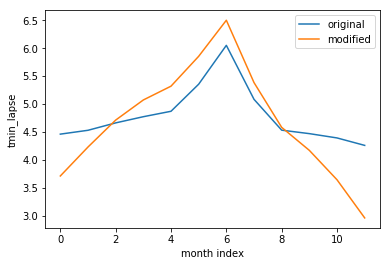

In [10]:
idx = np.arange(12) # month index

def parabola(x, a, h, k):
    return a*(x-h)**2 + k # vertex form for parabola

delta_arr = parabola(idx, -.05, 5, .5)

plt.plot(params['tmin_lapse'], label='original')
plt.plot(params['tmin_lapse'] + delta_arr, label='modified')
plt.legend()
plt.ylabel('tmin_lapse')
plt.xlabel('month index')

# Save modified parameter file using `Parameters.write`

In [11]:
# modify the original parameter file in place 
params['tmin_lapse'] = params['tmin_lapse'] + delta_arr
params['tmin_lapse']

array([3.71074257, 4.22973448, 4.71229683, 5.07304494, 5.32037115,
       5.85558136, 6.50199457, 5.38453339, 4.58184722, 4.16964689,
       3.64260846, 2.95908429])

In [12]:
# simple method to write back to PRMS ascii format with file path argument
params.write('../test/data/models/lbcd/parameters_adjusted')

In [13]:
# reading modified parameter file back to show that it has been changed 
params_adj = Parameters('../test/data/models/lbcd/parameters_adjusted')
params_adj['tmin_lapse']

array([3.71074257, 4.22973448, 4.71229683, 5.07304494, 5.32037115,
       5.85558136, 6.50199457, 5.38453339, 4.58184722, 4.16964689,
       3.64260846, 2.95908429])

# Visualization

The built in `Parameters.plot` method enables plotting of single and multi-dimensional parameters or various lengths. In the case of spatial parameters 2-D plots are created assuming the HRU discretization of the model is a uniform rectangular grid (HRUs have square dimensions e.g. 10 m X 10 m) assuming standard indexing with indices starting from the upper left corner moving to the right across columns and then down rows. One dimensional and single valued parameters are printed individually or all together as an HTML table. Single dimensional parameters with more than one value (e.g. time series) are plotted as line plots. The default action of `Parameters.plot` is to save all parameter plots/tables to files depending on their dimensions, e.g. parameters that have dimensions of nhru by nmonths (spatial monthly parmaeters) are printed to a multipage pdf file where each month has its own page as a 2-D plot. Finally the matplotlib style that the use prefers can be passed to the plot function for increased functionality.

In [14]:
# here is an example of trying to plot a single dimensional and single value parameter
# note that the nrows argument must be specified even for non spatial parameters however the value is only
# used when plotting spatial (dimensional by nhru or ngru) parameters
params.plot(nrows=99, which='radj_sppt')

radj_sppt is single valued with value: 0.4924942352224324


In [15]:
# several plot styles are available to experiment with from matplotlib
print(plt.style.available)
import matplotlib
matplotlib.get_configdir()

['dark_background', 'ggplot', 'fast', 'fivethirtyeight', 'seaborn-whitegrid', 'seaborn-dark', 'seaborn-colorblind', 'classic', 'grayscale', 'seaborn-bright', 'presentation', 'seaborn', 'seaborn-poster', 'Solarize_Light2', 'seaborn-deep', 'seaborn-pastel', 'seaborn-talk', 'seaborn-notebook', 'bmh', 'seaborn-dark-palette', 'seaborn-ticks', 'seaborn-paper', 'seaborn-white', 'seaborn-muted', 'seaborn-darkgrid', '_classic_test']


'/home/johnvolk/.config/matplotlib'

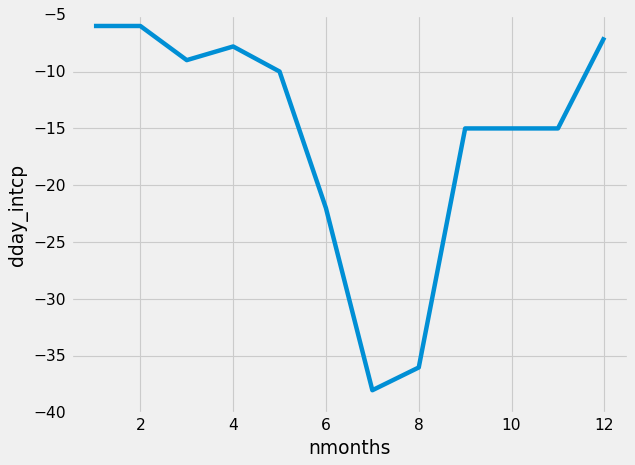

In [16]:
# example plotting single dimensional multi-valued parameter with matplotlib style specified
params.plot(nrows=99, which='dday_intcp', mpl_style='fivethirtyeight') 

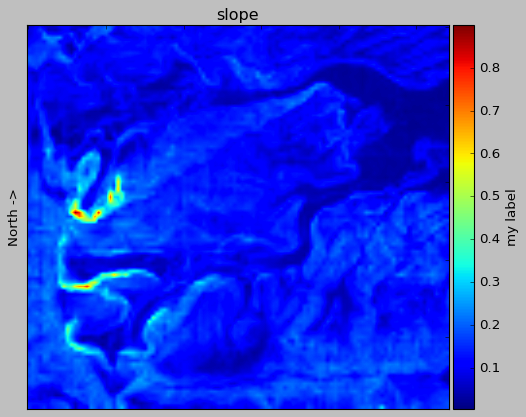

In [17]:
# example of plotting a 2-D spatial parameter
params.plot(nrows=99, which='hru_slope', cbar_label='my label',\
            ylabel='North ->',title='slope')

In [18]:
# plotting a spatial parameter that has an additional time dimension e.g. rain_adj which is 
# nhru by nmonths will result in the printing of a multipage pdf with filename the name of the parameter
# each page will be labeled with the parameter name and month
params.plot(nrows=99, which='rain_adj', cbar_label='my label',\
            ylabel='North ->',title='slope')

In [19]:
# if the which argument is 'all' four files will be saved including one html with single valued parameters 
# in a table, and three multipage pdfs for time series plots, 2-D parameters, and 2-D parameters that vary 
# by month
plot_dir = os.path.join(os.getcwd(),'plots')
params.plot(nrows=99, which='all', out_dir=plot_dir, mpl_style='ggplot')

gvr_hru_pct parameter failed to plot
gvr_hru_pct parameter failed to plot


../prms_python/parameters.py:226: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  df.set_value(p, 'value', params[p])


Currently spatial parameters with dimension ncascade are not plotted due to difficulties with spatial representation. The output directory given to the function will be created if it does not exist.